<h1>Dengue Data Analysis</h1>
<hr>
<h3>Analyst: Mary Angelie Remojo</h3>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [4]:
dengue = pd.read_csv('dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h2>1. WHAT YEAR HAS THE HIGHEST DENGUE CASES RECORDED?<h2>

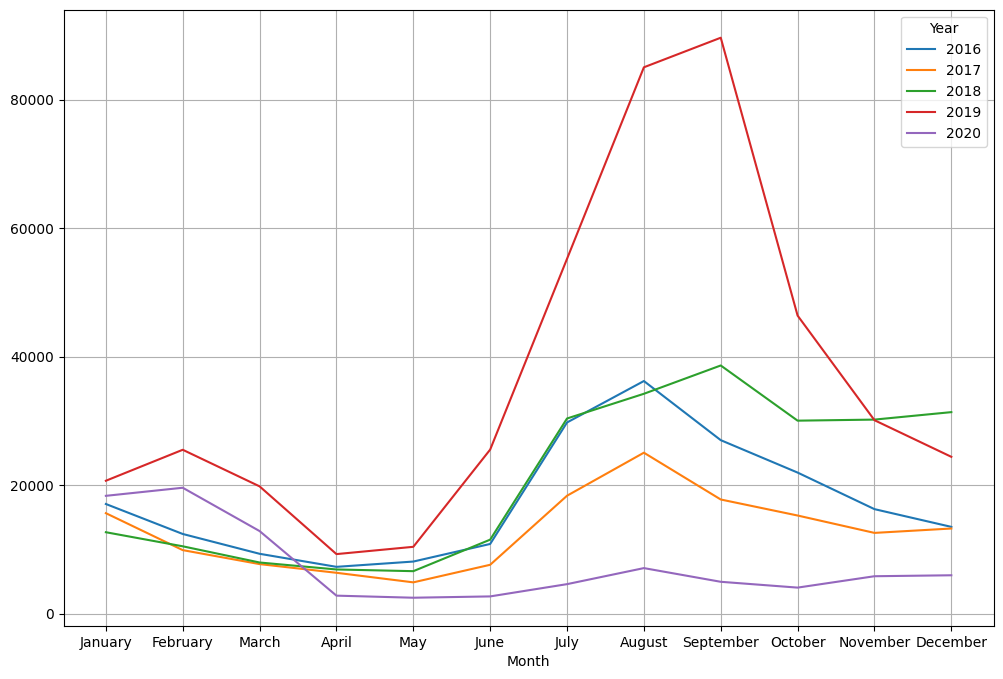

In [5]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<p>INSIGHT 1: AS SHOWN IN THE GRAPH, YOU CAN SEE THAT THE YEAR 2019 HAS THE MOST HIGHEST DENGUE CASES OCCURED.<p>
<p>INSIGHT 2: YOU CAN SEE HOW THE DENGUE CASES SPIKED ON THE MONTH OF AUGUST AND SEPTEMBER IN THE YEAR 2019 RESULTING IN 80,000 CASES RECORDED.<p>
<p>INSIGHT 3: WHILE 2019 BEING THE MOST HIGHEST DENGUE CASES RECORDED, THE FOLLOWING YEAR WHICH IS 2020 HAS THE LOWEST DENGUE CASES OF ALL YEARS.<p>

<h2>2. Which region has the highest dengue cases overall?<h2>

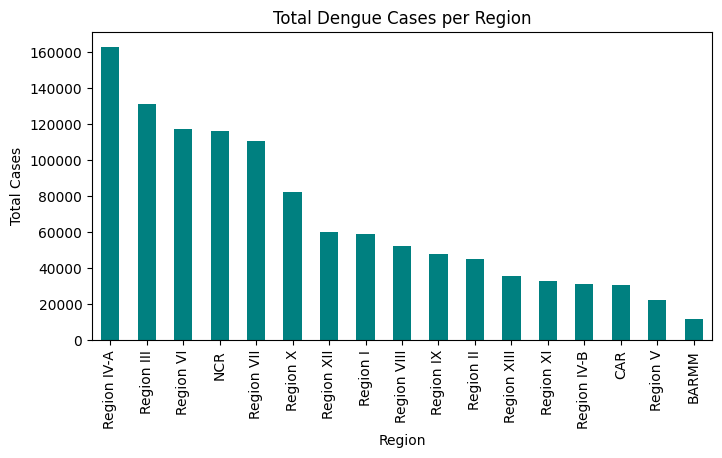

Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Name: Dengue_Cases, dtype: int64

In [14]:
# Total cases per region
cases_per_region = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
cases_per_region.plot(kind="bar", color="teal")
plt.title("Total Dengue Cases per Region")
plt.ylabel("Total Cases")
plt.xlabel("Region")
plt.show()

cases_per_region.head()

<p>INSIGHT 1:THE REGION WITH THE HIGHEST DENGUE CASES OVERALL IS THE REGION IV-A, WITH OVER 160,000 CASES RECORDED.<p>

<h2>3. Which region has the most dengue-related deaths?<h2>

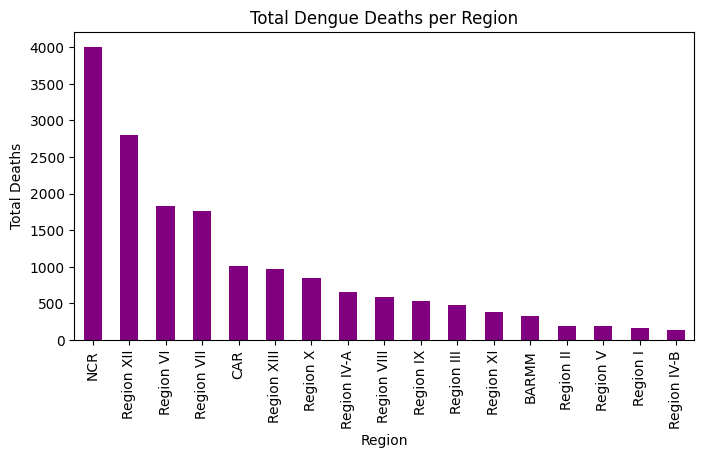

Region
NCR           4008
Region XII    2796
Region VI     1825
Region VII    1760
CAR           1008
Name: Dengue_Deaths, dtype: int64

In [17]:
deaths_per_region = dengue.groupby("Region")["Dengue_Deaths"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
deaths_per_region.plot(kind="bar", color="purple")
plt.title("Total Dengue Deaths per Region")
plt.ylabel("Total Deaths")
plt.xlabel("Region")
plt.show()

deaths_per_region.head()



<p>INSIGHT 1: NCR HAS THE MOST DENGUE-RELATED DEATHS RECORDED COMPARED TO OTHER REGIONS, WITH A TOTAL OF 4008 RECORDED DEATHS.<p>
<p>INSIGHT 2: REGION IV-A WITH THE MOST DENGUE CASES RECORD, PLACED 8TH FOR HAVING THE MOST DENGUE-RELATED DEATHS PER REGION, WITH ATLEAST 600 CASES.<p>

<h2>4. What is the trend of dengue cases from 2016 to 2022?<h2>

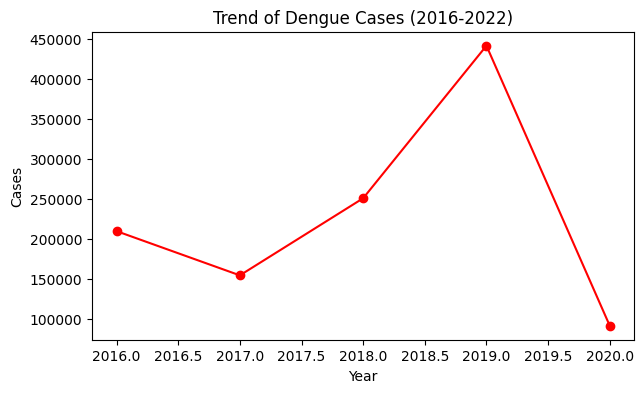

In [19]:
plt.figure(figsize=(7,4))
dengue.groupby("Year")["Dengue_Cases"].sum().plot(marker='o', color='red')
plt.title("Trend of Dengue Cases (2016-2022)")
plt.ylabel("Cases")
plt.xlabel("Year")
plt.show()


<p>INSIGHT 1: THE NUMBER OF DENGUE CASES FLUCTUATES YEARLY, WITH A NOTABLE SPIKE IN 2019 FOLLOWED BY A DROP IN 2020, PROBABLY BECAUSE OF THE PANDEMIC CONDITIONS.<p>

<h2>5. Which month-region combination has the highest dengue cases?<h2>

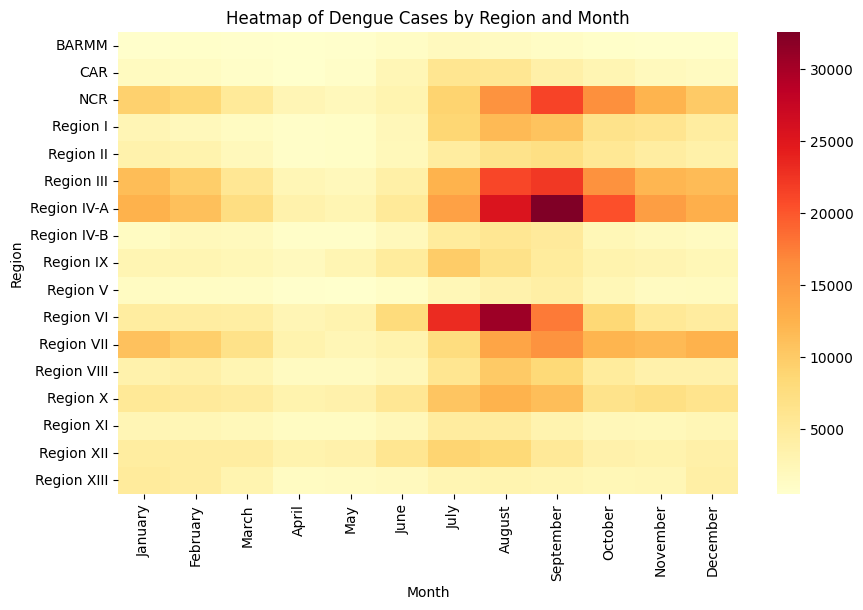

In [22]:
pivot = dengue.pivot_table(values="Dengue_Cases", index="Region", columns="Month", aggfunc="sum")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Heatmap of Dengue Cases by Region and Month")
plt.show()


<p>INSIGHT 1: THE MONTH-REGION COMBINATION WITH THE HIGHEST DENGUE CASES IS SEPTEMBER IN REGION IV-A, FOLLOWED BY REGION VI IN THE MONTH OF AUGUST.<p>

<h2>6. What is the monthly trend of dengue cases averaged across all years?<h2>

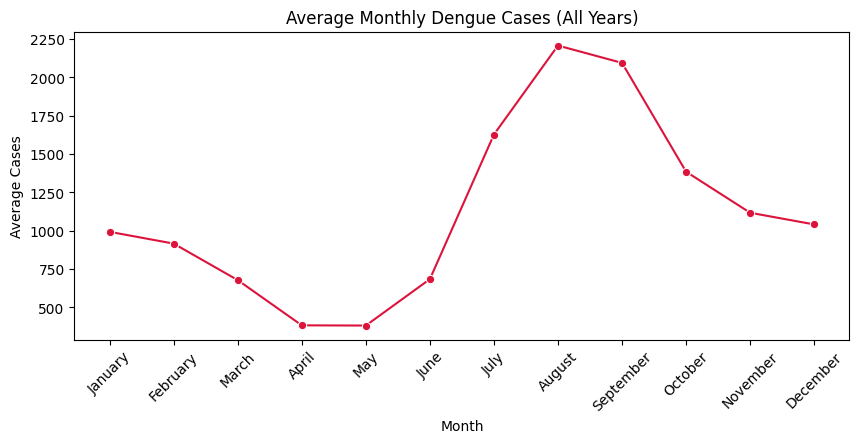

In [26]:
avg_monthly = dengue.groupby("Month")["Dengue_Cases"].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=avg_monthly.index, y=avg_monthly.values, color="crimson", marker="o")
plt.title("Average Monthly Dengue Cases (All Years)")
plt.ylabel("Average Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


<p>INSIGHT: THE DENGUE CASES STARTED RISING AROUND JUNE, PEAKED IN AUGUST TO SEPTEMBER, AND THEN DROPPED BY DECEMBER, SHOWING A CLEAR SEASONAL PATTERN.<p>

<h2>7. Which regions have the most stable dengue case counts?<h2>

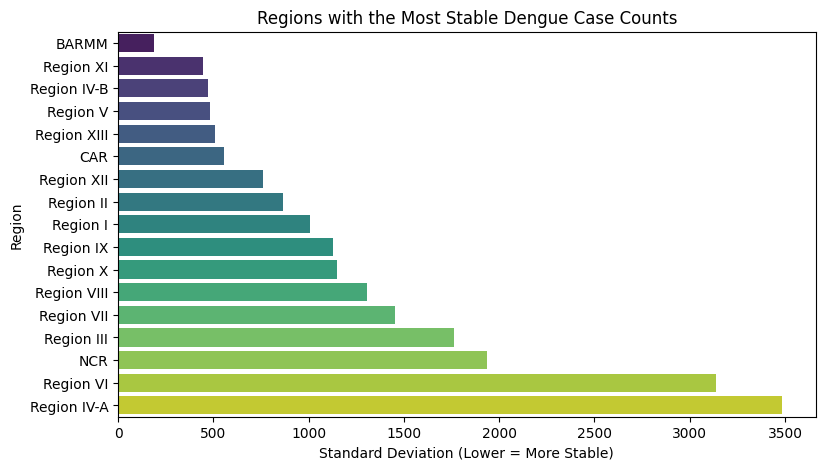

In [27]:
region_variation = dengue.groupby("Region")["Dengue_Cases"].std().sort_values()

plt.figure(figsize=(9,5))
sns.barplot(x=region_variation.values, y=region_variation.index, palette="viridis")
plt.title("Regions with the Most Stable Dengue Case Counts")
plt.xlabel("Standard Deviation (Lower = More Stable)")
plt.ylabel("Region")
plt.show()


<p>INSIGHT 1: BARMM AND REGION XI HAVE THE MOST STABLE DENGUE PATTERS, WHILE REGION IV-A AND REGION VI EXPERIENCE UNPREDICTABLE SURGES.<p>